# Predicting Default Loan of Czech Bank (EDA)

### Dataset taken from
https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions





### 

https://webpages.uncc.edu/mirsad/itcs6265/group1/index.html

Project Goal
The Berka dataset, from the 1999 PKDD Discovery Challenge, provides information on the clients, accounts, and transactions of a Czech bank. The original task description of the Discovery Challenge states:

The bank wants to improve their services. For instance, the bank managers have only vague idea, who is a good client (whom to offer some additional services) and who is a bad client (whom to watch carefully to minimize the bank loses). Fortunately, the bank stores data about their clients, the accounts (transactions within several months), the loans already granted, the credit cards issued The bank managers hope to improve their understanding of customers and seek specific actions to improve services. A mere application of a discovery tool will not be convincing for them.
In keeping with the original task description, our project goal is to mine and analyze this bank data in order to extrapolate from it the type of customer who makes a good candidate for a credit card.

### Business Objectives:

(1)	In data-driven world, what is the definition of a good loan? What features effects bad loans?

(2)	Which loan accounts are likely to default and why?

(3)	Using Machine Learning techniques, analyze the credit worthiness (credit scoring model) of bank’s customer based on income, expenses, balance, demographical location, transaction, credit cards, etc.

(4)	Find out ‘Customer lifetime value’ based on their transactions by data-driven approach.

(5)	Based on their transaction history, credit card info, geographical location, recommend a marketable bank’s product.

(6)	What are the characteristics of a good bank branch?



<img src="czeck_bank.png">

### Step involved in this project:

(1) Importing essential libraries

(3) Reading and Processing Data

(4) Data Cleaning & Exploratory data analysis (EDA)

(5) Feature Engineering

(6) Train Test Split

(7) Normalization and One Hot Encoding

(9) Fitting the model

(10) Model Evaluation (Testing and validation accuracy, confusion matrix, analysis of misclassified instances)



### How to connect PostgreSQL to Python
https://towardsdatascience.com/python-and-postgresql-how-to-access-a-postgresql-database-like-a-data-scientist-b5a9c5a0ea43

https://www.datacamp.com/community/tutorials/tutorial-postgresql-python



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

import psycopg2
import psycopg2.extras

%matplotlib inline

plt.rcParams['figure.figsize'] = (10,8)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

!conda info



     active environment : cv
    active env location : /Users/khan_m_a/opt/anaconda3/envs/cv
            shell level : 2
       user config file : /Users/khan_m_a/.condarc
 populated config files : /Users/khan_m_a/.condarc
          conda version : 4.9.2
    conda-build version : 3.20.5
         python version : 3.7.6.final.0
       virtual packages : __osx=10.16=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /Users/khan_m_a/opt/anaconda3  (writable)
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /Users/khan_m_a/opt/anaconda3/pkgs
                          /Users/khan_m_a/.conda/pkgs
       envs directories : /Users/khan_m_a/opt/anaconda3/envs
                          /Users/k

In [2]:
#stopping warnings
import warnings
with warnings.catch_warnings():

    warnings.simplefilter("ignore")
    warnings.filterwarnings("ignore")

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

	

In [3]:
DB_HOST = "localhost"
DB_NAME = "czech_bank_trans"
DB_USER = "postgres"
DB_PASS = "3822"

In [4]:
# conn = psycopg2.connect(dbname=DB_NAME, 
#             user=DB_USER, 
#             password=DB_PASS, 
#             host=DB_HOST)

#cur = conn.cursor()
#print('Connection established')


In [5]:
def create_df_from_db(schema, table):
    # Establish the connection with db
    conn = psycopg2.connect(dbname=DB_NAME, 
            user=DB_USER, 
            password=DB_PASS, 
            host=DB_HOST)

    #write the sql command
    sql_command = 'select {} from {}'.format(str(schema), str(table))
    #print('Executint this command ', sql_command)
    #load it to pandas
    df = pd.read_sql(sql_command, conn)
    #print('df has shape of ', df.shape)
    #print(df.info())

    conn.close()
    return df

def create_all_dbs(lst):
    #calling all tables from db
    df_names = []
    for name in lst:
        df = 'df' + 'name'
        df  = create_df_from_db('*', name)
        print('{} has been created with the shape of {}' .format(name, df.shape))
        df_names.append(df )
    print('*'* 50)
    print('Total No. of df created', len(df_names))
    return df_names




In [6]:
#load all the tables from SQL to pandas

schemas = ['account', 'card', 'client', 'disp', 'district', 'loan', 'orders', 'trans']
#df_all = 'df_account, df_card, df_client, df_disp, df_district, df_loan, df_orders, df_trans'

df_account, df_card, df_client, df_disp, df_district, df_loan, df_orders, df_trans = create_all_dbs(schemas)


account has been created with the shape of (4500, 4)
card has been created with the shape of (892, 4)
client has been created with the shape of (5369, 3)
disp has been created with the shape of (5369, 4)
district has been created with the shape of (77, 16)
loan has been created with the shape of (682, 7)
orders has been created with the shape of (6471, 6)
trans has been created with the shape of (1056320, 10)
**************************************************
Total No. of df created 8


In [7]:
# save data locally

file_dir = 'data'
try:
    os.makedirs(file_dir)
except:
    print('Dir already exists')

if len(os.listdir(file_dir)) == 0:
    print(len(os.listdir(file_dir)))
    print('Directory empty, saving files')
    # if dir empty save the files
    for d in range(len(schemas)):
        
        d.to_csv(file_dir + '/' + schemas[d] + '.csv')
else:
    for d in range(len(schemas)):
        
        df = 'df_' + schemas[d]
        df  = pd.read_csv(file_dir + '/' + schemas[d] + '.csv')
        print(f"File {schemas[d]} has a shape of {df.shape}")



Dir already exists
File account has a shape of (4500, 9)
File card has a shape of (892, 9)
File client has a shape of (5369, 8)
File disp has a shape of (5369, 9)
File district has a shape of (77, 21)
File loan has a shape of (682, 12)
File orders has a shape of (6471, 11)
File trans has a shape of (1056320, 15)
/Users/khan_m_a/opt/anaconda3/envs/cv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
for dirpath, dirnames, files in os.walk(file_dir):
    print(files)


['loan.csv', 'orders.csv', '.DS_Store', 'client.csv', 'district.csv', 'trans.csv', 'account.csv', 'card.csv', 'disp.csv']


In [9]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   trans_id    1056320 non-null  int64         
 1   account_id  1056320 non-null  int64         
 2   date        1056320 non-null  datetime64[ns]
 3   type        1056320 non-null  object        
 4   operation   873206 non-null   object        
 5   amount      1056320 non-null  float64       
 6   balance     1056320 non-null  float64       
 7   k_symbol    574439 non-null   object        
 8   bank        273508 non-null   object        
 9   account     295389 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 80.6+ MB


In [10]:
# query returing df
def execute_fetch_sql(query):
    # Establish the connection with db
    conn = psycopg2.connect(dbname=DB_NAME, 
            user=DB_USER, 
            password=DB_PASS, 
            host=DB_HOST)

    # create a new cursor
    cur = conn.cursor()
    #execute command
    cur.execute(query)
    #return the value
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

### Unpaid Loan 

In [11]:
# customer didn't return their loan

query = '''
select  client.client_id, loan.loan_id, loan.duration, loan.payment, client.district_id, loan.account_id, loan.status, loan.amount, loan.date as loan_date, account.date as account_date 
from loan
join disp
on loan.account_id = disp.account_id
join client
on disp.client_id = client.client_id
join account
on account.account_id = disp.account_id
--where loan.status = 'B' or loan.statu = ‘D’
'''
df_client_loan = execute_fetch_sql(query)

In [12]:
df_client_loan.head()

,client_id,loan_id,duration,payment,district_id,account_id,status,amount,loan_date,account_date
0,2,4959,24.0,3373.0,1,2,A,80952.0,1994-01-05,1993-02-26
1,3,4959,24.0,3373.0,1,2,A,80952.0,1994-01-05,1993-02-26
2,25,4961,12.0,2523.0,21,19,B,30276.0,1996-04-29,1995-04-07
3,31,4962,12.0,2523.0,68,25,A,30276.0,1997-12-08,1996-07-28
4,45,4967,60.0,5308.0,20,37,D,318480.0,1998-10-14,1997-08-18


In [13]:
# finding correlations

df_client_loan.corr()


,client_id,loan_id,duration,payment,district_id,account_id,amount
client_id,1.000000,0.999648,0.027724,-0.054058,-0.022086,0.999891,-0.028251
loan_id,0.999648,1.000000,0.028770,-0.055237,-0.022562,0.999861,-0.028290
duration,0.027724,0.028770,1.000000,-0.042414,0.046336,0.028454,0.615840
payment,-0.054058,-0.055237,-0.042414,1.000000,-0.016275,-0.055073,0.683020
district_id,-0.022086,-0.022562,0.046336,-0.016275,1.000000,-0.022631,0.000828
account_id,0.999891,0.999861,0.028454,-0.055073,-0.022631,1.000000,-0.028372
amount,-0.028251,-0.028290,0.615840,0.683020,0.000828,-0.028372,1.000000


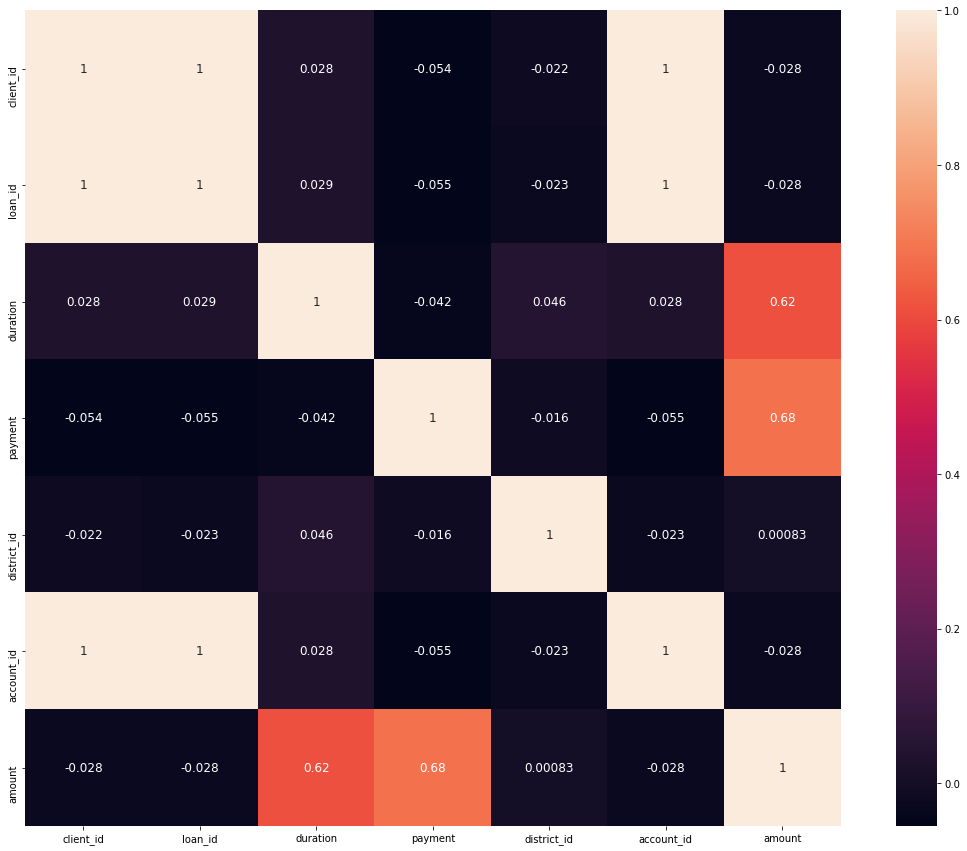

In [14]:

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_client_loan.corr(),
            ax = ax,
            annot=True,
            square=True,
            annot_kws={'fontsize': 12}
            )

plt.show();

In [15]:
# Checking good and bad loan

df_client_loan_good = df_client_loan.loc[(df_client_loan['status'] =='A') | (df_client_loan['status'] == 'C')]

df_client_loan_bad = df_client_loan.loc[(df_client_loan['status'] =='B') | (df_client_loan['status'] == 'D')]

df_client_loan['default'] = 0
df_client_loan['default'] = (df_client_loan['status'] =='B') | (df_client_loan['status'] == 'D')
df_client_loan['default'] = df_client_loan['default'].astype(int)

print('Percent of Default Loans :', 100*(df_client_loan['default'] == 1).sum()/len(df_client_loan))


Percent of Default Loans : 9.189842805320435


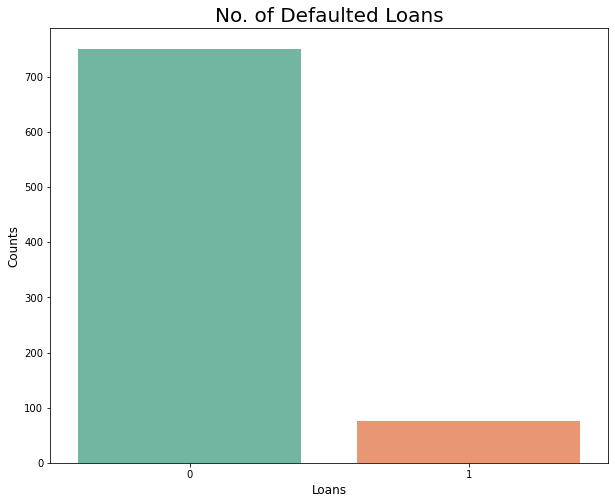

In [16]:
# plot the number of defualts
sns.countplot(data= df_client_loan, x = 'default', palette='Set2')#.set_title('No. of Defaulted Loans')
plt.title('No. of Defaulted Loans', fontsize =20)
plt.xlabel('Loans', fontsize =12)
plt.ylabel('Counts', fontsize =12)
plt.show();

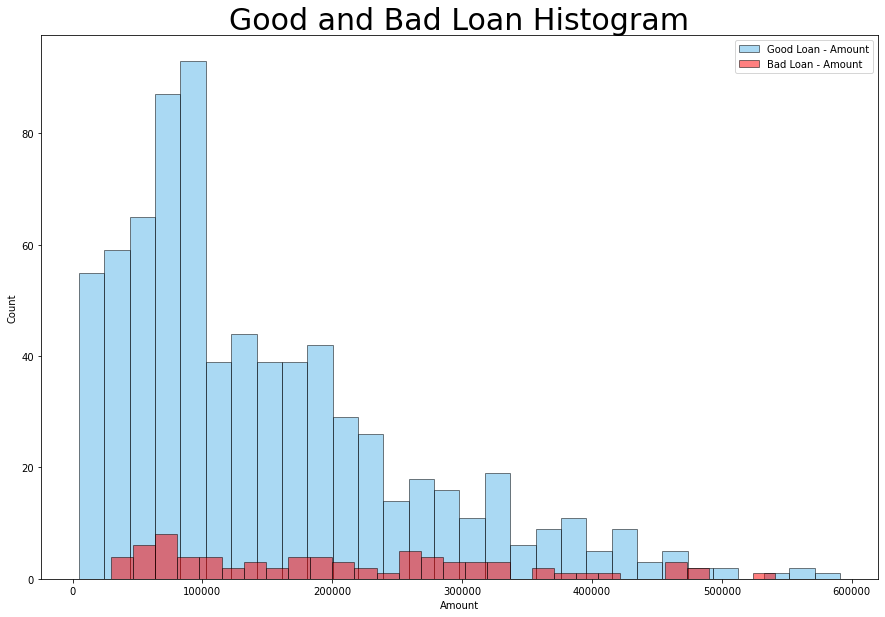

In [17]:
# Amount of the loan in Good and Bad

f, ax = plt.subplots(1,1)
f.set_figheight(10)
f.set_figwidth(15)


# plt.figure(figsize=(15,10))
plt.hist(df_client_loan_good['amount'], color = '#56B4E9', edgecolor ='black',bins=30,  alpha=0.5, label='Good Loan - Amount')
plt.hist(df_client_loan_bad['amount'], bins=30, alpha=0.5, label='Bad Loan - Amount', color = 'red', edgecolor ='black')
# plt.gca().set(title='Amount Histogram', ylabel='Count');
plt.legend(loc='upper right')
# ax.set_title('xxx')
ax.set_title('Good and Bad Loan Histogram', fontsize=30)
ax.set_xlabel('Amount')
ax.set_ylabel('Count')
plt.show()

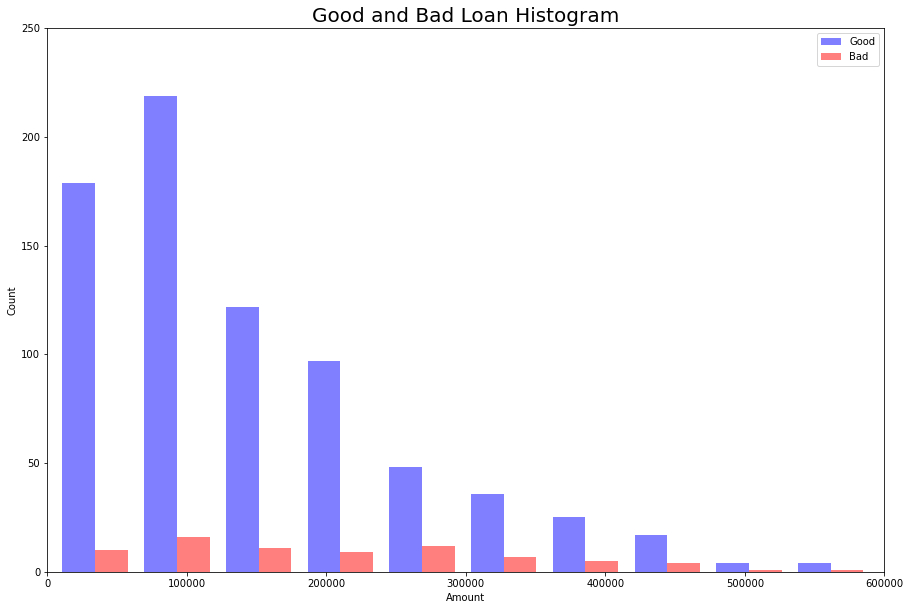

In [18]:
#set figure
#set figure
f, ax = plt.subplots(1,1)
f.set_figheight(10)
f.set_figwidth(15)

#next to each other
plt.hist([df_client_loan_good['amount'], df_client_loan_bad['amount']], bins=10, alpha=0.5, color=['blue','red' ], label = ['Good', 'Bad'])
#set legend
plt.legend(loc='upper right')
#set title & axis titles
ax.set_title('Good and Bad Loan Histogram', fontsize=20)
ax.set_xlabel('Amount')
ax.set_ylabel('Count')
#set x & y ranges
plt.xlim(0,600000)
plt.ylim(0, 250)
plt.show()

# plt.show()

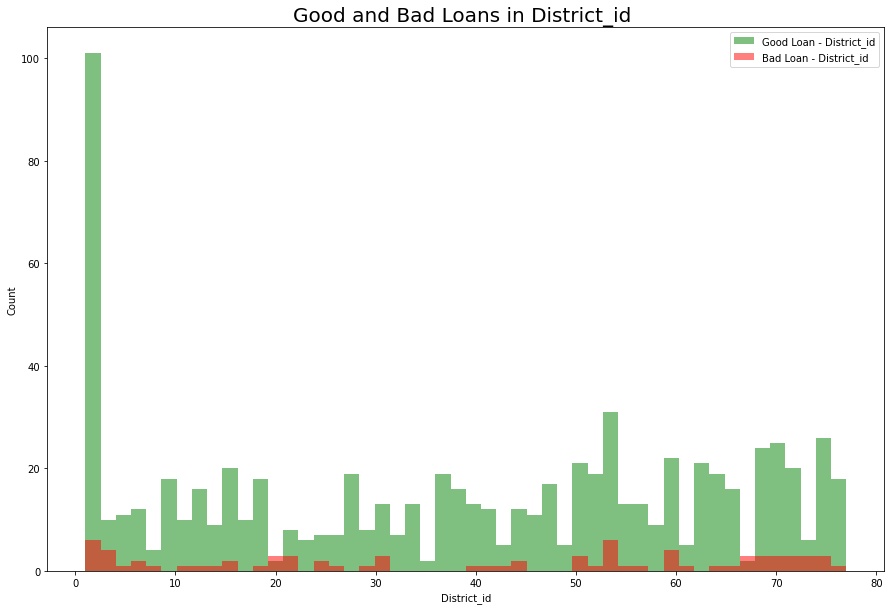

In [19]:
# Good and Bad Loans in District_id

f, ax = plt.subplots(1,1)
f.set_figheight(10)
f.set_figwidth(15)


# plt.figure(figsize=(15,10))
plt.hist(df_client_loan_good['district_id'], bins=50,  alpha=0.5, label='Good Loan - District_id', color = 'green')
plt.hist(df_client_loan_bad['district_id'], bins=50, alpha=0.5, label='Bad Loan - District_id', color = 'red')
# plt.gca().set(title='Amount Histogram', ylabel='Count');
plt.legend(loc='upper right')
# ax.set_title('xxx')
ax.set_title('Good and Bad Loans in District_id ', fontsize=20)
ax.set_xlabel('District_id')
ax.set_ylabel('Count')
plt.show()

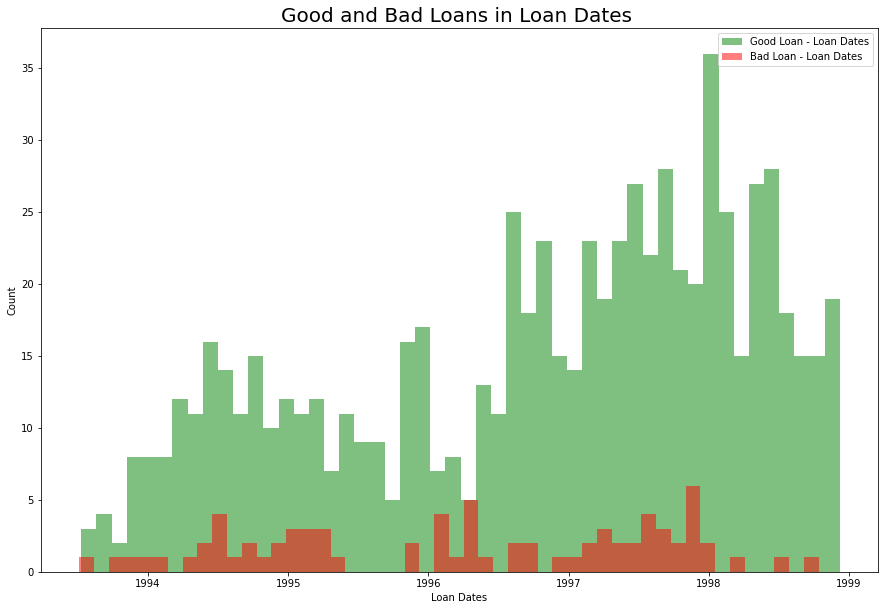

In [20]:
# Good and Bad loan in loan dates

f, ax = plt.subplots(1,1)
f.set_figheight(10)
f.set_figwidth(15)


# plt.figure(figsize=(15,10))
plt.hist(df_client_loan_good['loan_date'], bins=50,  alpha=0.5, label='Good Loan - Loan Dates', color = 'green')
plt.hist(df_client_loan_bad['loan_date'], bins=50, alpha=0.5, label='Bad Loan - Loan Dates', color = 'red')
# plt.gca().set(title='Amount Histogram', ylabel='Count');
plt.legend(loc='upper right')
# ax.set_title('xxx')
ax.set_title('Good and Bad Loans in Loan Dates ', fontsize=20)
ax.set_xlabel('Loan Dates')
ax.set_ylabel('Count')
plt.show()

In [21]:
df_client_loan.head()

,client_id,loan_id,duration,payment,district_id,account_id,status,amount,loan_date,account_date,default
0,2,4959,24.0,3373.0,1,2,A,80952.0,1994-01-05,1993-02-26,0
1,3,4959,24.0,3373.0,1,2,A,80952.0,1994-01-05,1993-02-26,0
2,25,4961,12.0,2523.0,21,19,B,30276.0,1996-04-29,1995-04-07,1
3,31,4962,12.0,2523.0,68,25,A,30276.0,1997-12-08,1996-07-28,0
4,45,4967,60.0,5308.0,20,37,D,318480.0,1998-10-14,1997-08-18,1


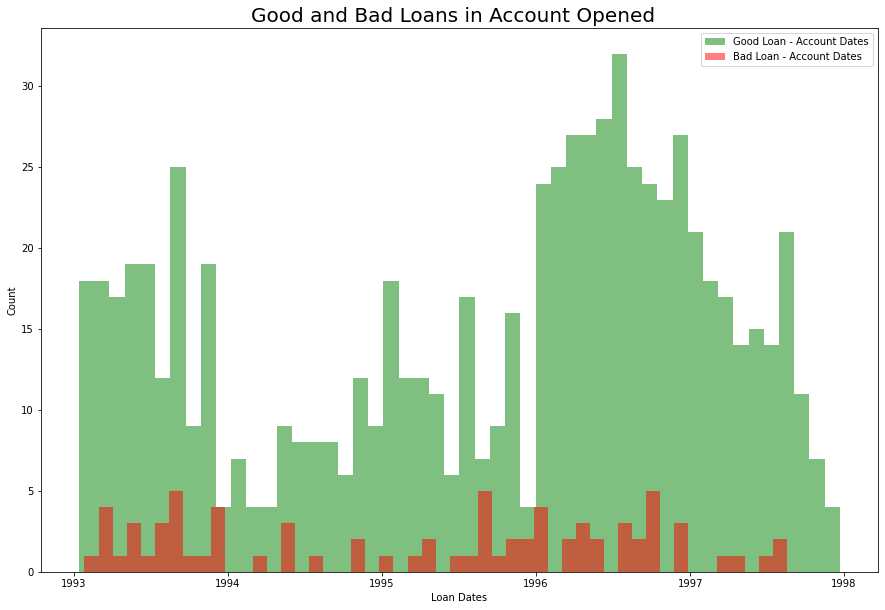

In [22]:
# Good and Bad loan in Account dates

f, ax = plt.subplots(1,1)
f.set_figheight(10)
f.set_figwidth(15)


# plt.figure(figsize=(15,10))
plt.hist(df_client_loan_good['account_date'], bins=50,  alpha=0.5, label='Good Loan - Account Dates', color = 'green')
plt.hist(df_client_loan_bad['account_date'], bins=50, alpha=0.5, label='Bad Loan - Account Dates', color = 'red')
# plt.gca().set(title='Amount Histogram', ylabel='Count');
plt.legend(loc='upper right')
# ax.set_title('xxx')
ax.set_title('Good and Bad Loans in Account Opened  ', fontsize=20)
ax.set_xlabel('Loan Dates')
ax.set_ylabel('Count')
plt.show()


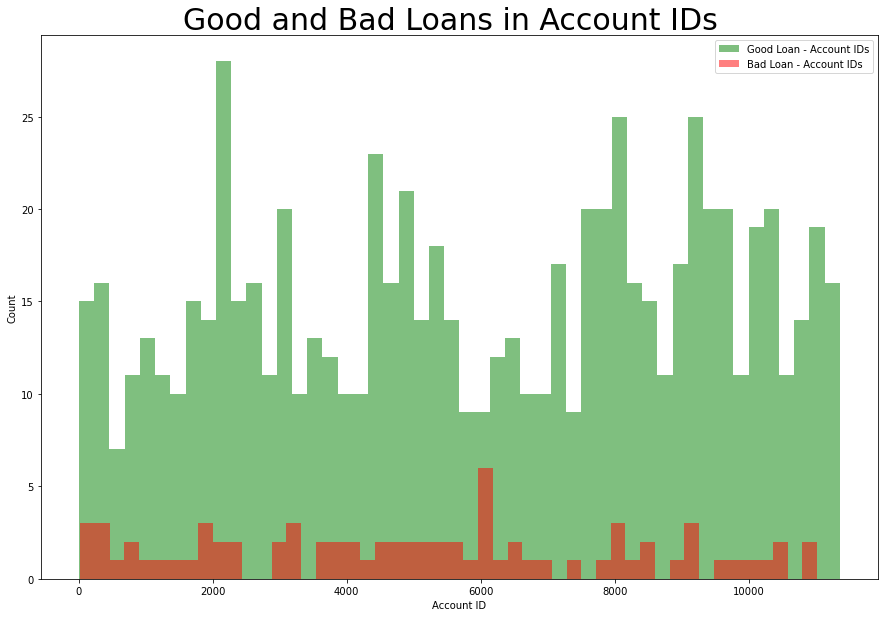

In [23]:
# Good and Bad loan in different duration

f, ax = plt.subplots(1,1)
f.set_figheight(10)
f.set_figwidth(15)


# plt.figure(figsize=(15,10))
plt.hist(df_client_loan_good['account_id'], bins=50,  alpha=0.5, label='Good Loan - Account IDs', color = 'green')
plt.hist(df_client_loan_bad['account_id'], bins=50, alpha=0.5, label='Bad Loan - Account IDs', color = 'red')
# plt.gca().set(title='Amount Histogram', ylabel='Count');
plt.legend(loc='upper right')
# ax.set_title('xxx')
ax.set_title('Good and Bad Loans in Account IDs  ', fontsize=30)
ax.set_xlabel('Account ID')
ax.set_ylabel('Count')
plt.show()

### Observation
There are approx 9% loans which are defaulted.

### Credit Card and Transaction

In [24]:
# junior card holders which averag balance on credit card

query = '''select trans.account_id, card.type as card_type, card.card_id,  disp.type as disp_type, cast(avg(trans.amount) as int) avg_amount, card.card_id,  cast(avg(trans.balance) as int) avg_balance
from trans
join disp
on trans.account_id = disp.account_id
join card
on disp.disp_id = card.disp_id
--where card.type = 'junior'

group by card.card_id, trans.account_id, disp_type
order by card.card_id asc
'''

df_card_trans = execute_fetch_sql(query)


In [25]:
df_card_trans.head()

,account_id,card_type,card_id,disp_type,avg_amount,card_id,avg_balance
0,7,gold,1,OWNER,9170,1,62599
1,14,classic,2,OWNER,6338,2,39604
2,33,gold,3,OWNER,9395,3,72338
3,34,classic,4,OWNER,10618,4,53976
4,43,junior,5,OWNER,8853,5,60897


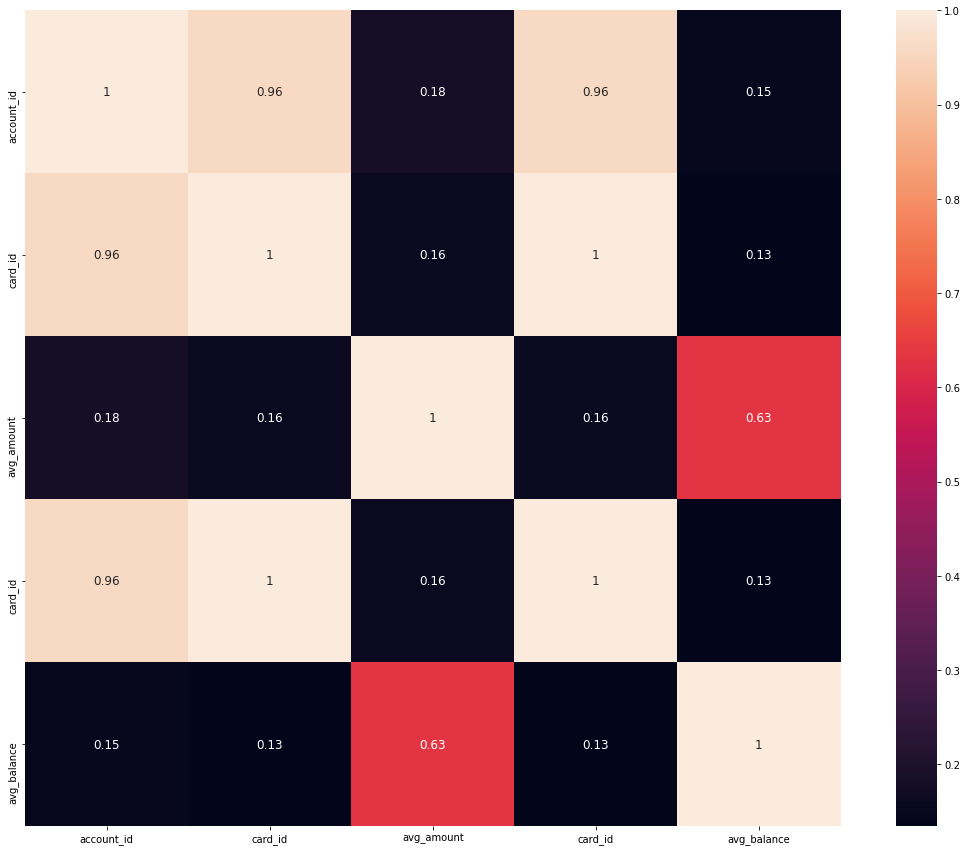

In [26]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_card_trans.corr(),
            ax = ax,
            annot=True,
            square=True,
            annot_kws={'fontsize': 12}
            )

plt.show();

In [27]:
df_junior = df_card_trans[df_card_trans['card_type'] == 'junior']
df_junior.head()


,account_id,card_type,card_id,disp_type,avg_amount,card_id,avg_balance
4,43,junior,5,OWNER,8853,5,60897
6,51,junior,8,OWNER,6887,8,59945
10,71,junior,12,OWNER,5435,12,51627
22,128,junior,24,OWNER,2042,24,43411
25,139,junior,27,OWNER,13615,27,58607


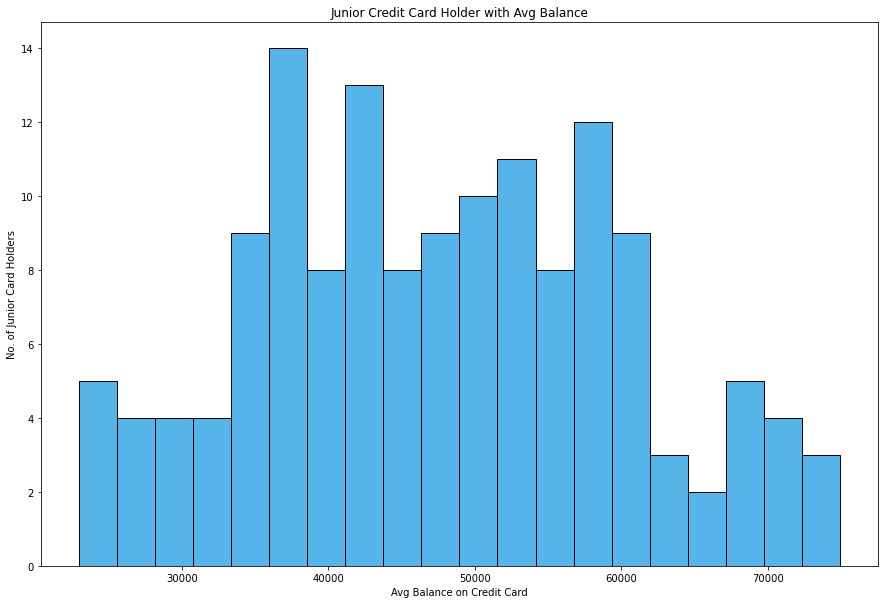

In [28]:
plt.figure(figsize= (15,10))
# sns.distplot(df_junior['avg'], hist=True, kde=False, 
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})
# colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
plt.hist(df_junior['avg_balance'], color ='#56B4E9', edgecolor ='black', bins = 20)
plt.title('Junior Credit Card Holder with Avg Balance')
plt.xlabel('Avg Balance on Credit Card')
plt.ylabel('No. of Junior Card Holders');

### Observations :
1 - One account corresponds to one card. There are no multiple cards

2 - On average 'Junior' card holders have $7300 worth of transactions.

3 - Majority of 'Junior' spend less than $2500



In [29]:
# trying same thing with python

# df_junior_temp = pd.merge(
#                     pd.merge(df_trans,
#                             df_disp,
#                             left_on= 'account_id',
#                             right_on= 'account_id',
#                             how = 'inner'),
#                             df_card,
#                             left_on= 'disp_id',
#                             right_on= 'disp_id',
#                             how= 'inner')
# df_junior_temp2 = df_junior_temp[df_junior_temp['type'] == 'junior']
# df_junior_temp3 =df_junior_temp2.groupby('card_id')

#df_junior_temp3.shape

### Credit Cards and Loans


In [30]:
# Credit cards and loans

query = '''select *
from loan
join disp
on loan.account_id = disp.account_id
join card
on disp.disp_id = card.disp_id

--group by card.card_id, loan.account_id
--order by card.card_id asc

'''

df_card_loans = execute_fetch_sql(query)

In [31]:
print(len(df_card_loans['loan_id'].unique()))
print(len(df_card_loans['card_id'].unique()))

170
170


In [32]:
df_card_loans.head()

,loan_id,account_id,date,amount,duration,payment,status,disp_id,client_id,account_id,type,card_id,disp_id,type,issued
0,4986,97,1997-08-10,102876.0,12.0,8573.0,A,116,116,97,OWNER,16,116,classic,1998-06-23
1,4989,105,1998-12-05,352704.0,48.0,7348.0,C,127,127,105,OWNER,17,127,classic,1998-06-07
2,4990,110,1997-09-08,162576.0,36.0,4516.0,C,132,132,110,OWNER,21,132,classic,1998-02-26
3,4996,132,1996-11-06,88440.0,12.0,7370.0,A,158,158,132,OWNER,25,158,classic,1997-12-06
4,5015,226,1998-07-12,109344.0,12.0,9112.0,C,272,272,226,OWNER,45,272,classic,1997-12-05


In [33]:
df_card_loans['status'].value_counts()

C    105
A     60
D      3
B      2
Name: status, dtype: int64

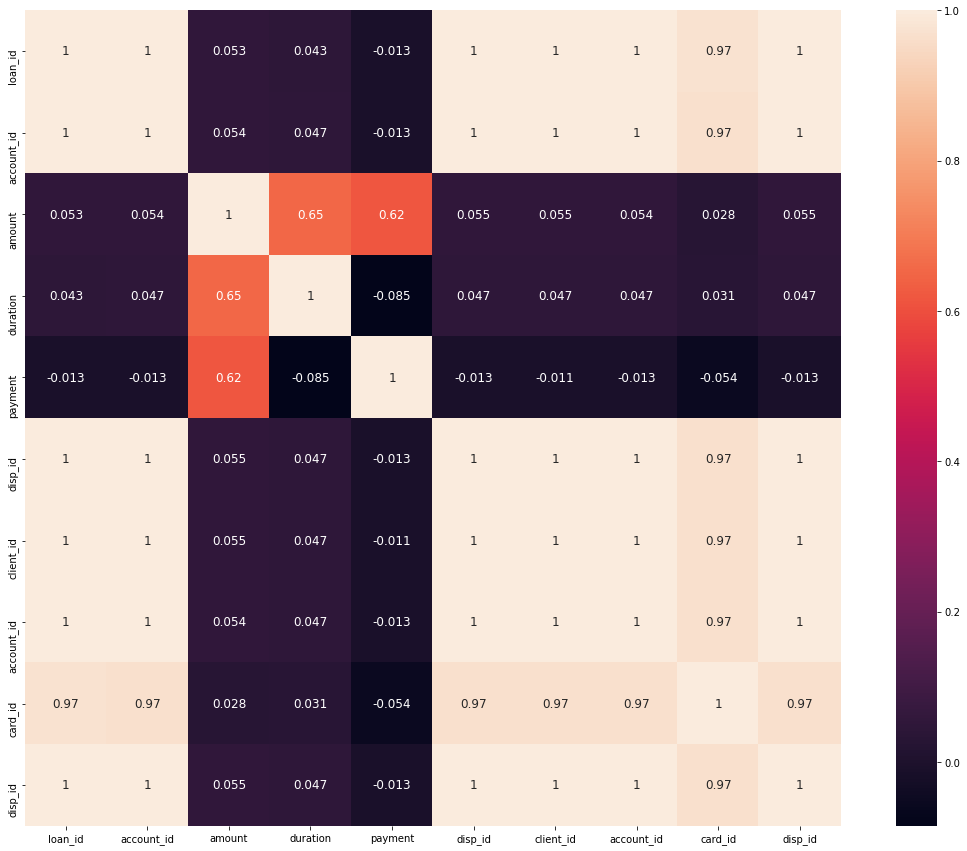

In [34]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_card_loans.corr(),
            ax = ax,
            annot=True,
            square=True,
            annot_kws={'fontsize': 12}
            )

plt.show();

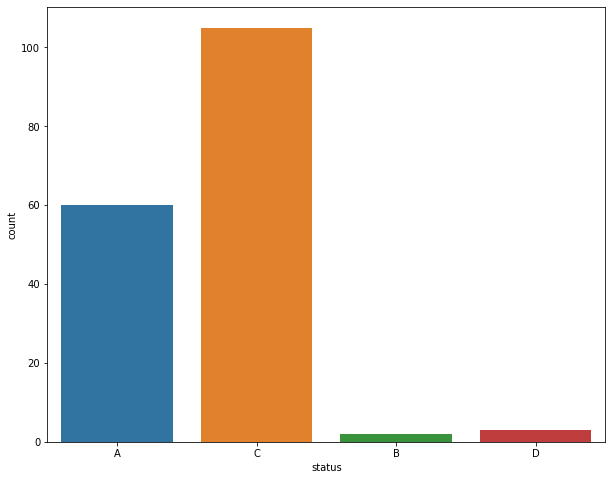

In [35]:
sns.countplot(x = 'status', data = df_card_loans);

### Observations:
1 - Out of 892 credit card holders 170 have taken the loan as well.

2- Every credit card holder has one loan only.

3- On average every credit card holder owes $155K

4- Appprox 98% credit card holders are in good standing as far as loan is concerned.



### Clients and transactions

In [36]:
# build, for each client, the number of transactions

query = '''
select client.client_id, count(distinct(trans.trans_id)) as num_trans,  cast(avg(distinct(trans.amount)) as decimal(10,2)) as avg_amount
from trans
join disp
on trans.account_id = disp.account_id
join client
on disp.client_id = client.client_id
group by client.client_id
order by client.client_id asc
'''

df_client_trans = execute_fetch_sql(query)
df_client_trans.head()


,client_id,num_trans,avg_amount
0,1,239,1086.24
1,2,478,4379.52
2,3,478,4379.52
3,4,117,2123.08
4,5,117,2123.08


In [37]:
df_client_trans['num_trans'].mean()

235.16949152542372

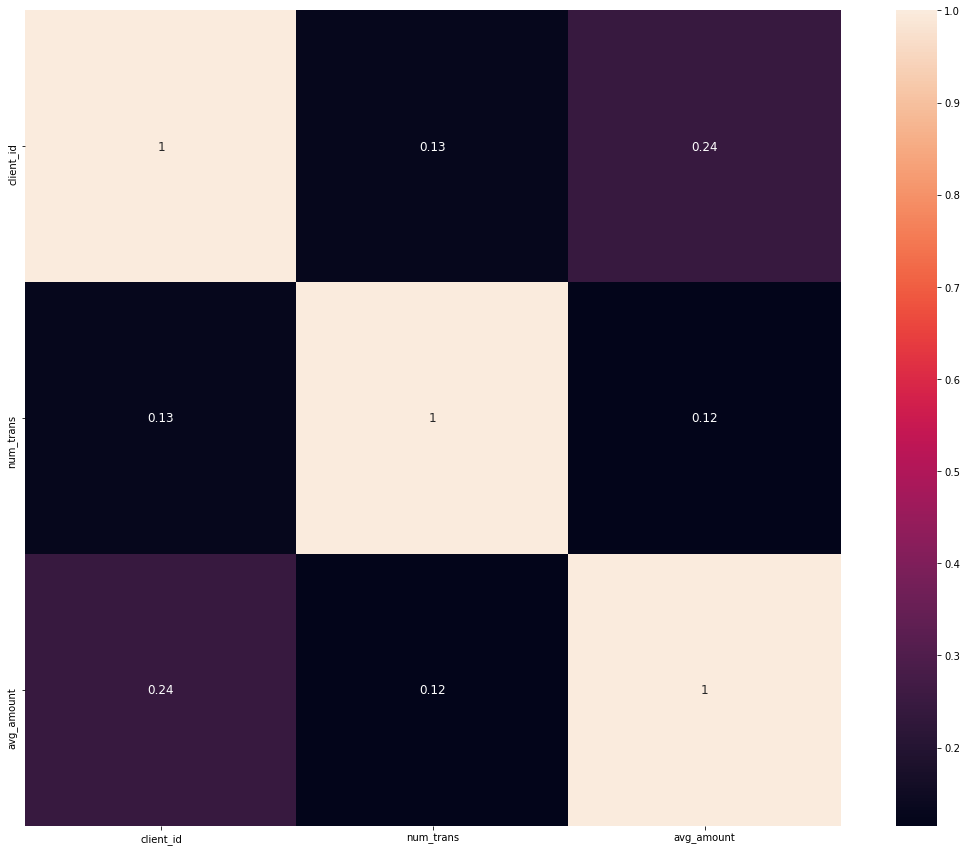

In [38]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_client_trans.corr(),
            ax = ax,
            annot=True,
            square=True,
            annot_kws={'fontsize': 12}
            )

plt.show();

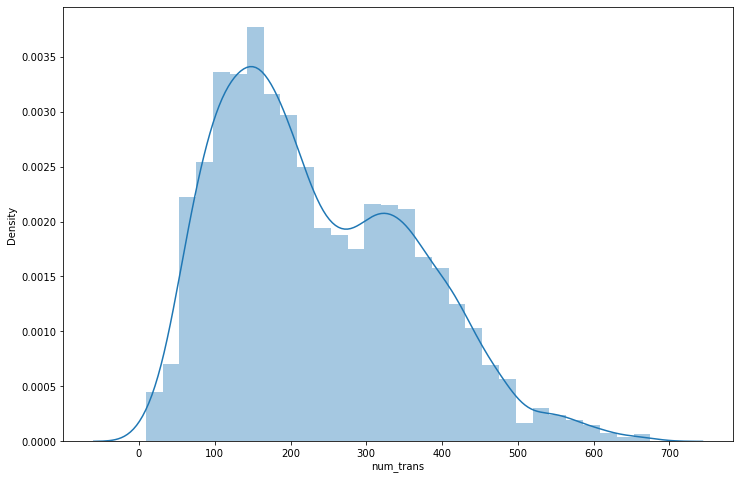

In [39]:
plt.figure(figsize= (12,8))
sns.distplot(df_client_trans['num_trans']);

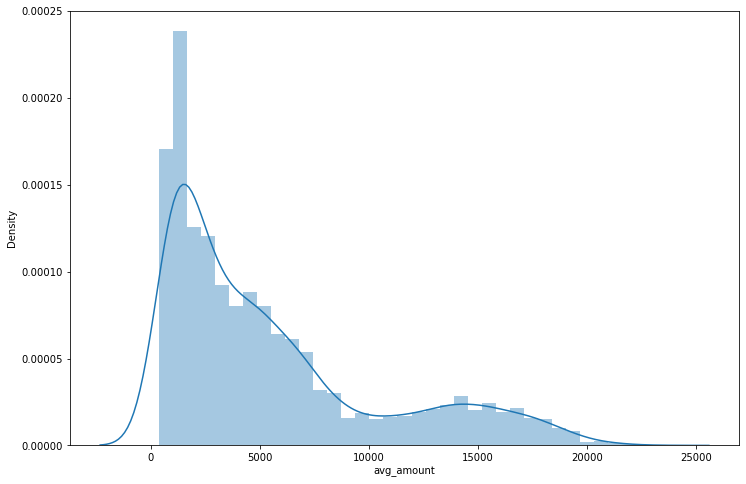

In [40]:
plt.figure(figsize= (12,8))
sns.distplot(df_client_trans['avg_amount']);


### Observations:
1- There are 235 average number of transaction by each client.

2- Total amount in transactions per client before and after Jan 95 is same


    

In [ ]:
'''
## Setting the graph parameters:
fig1, ax = plt.subplots(figsize=[12,6])  #Defines the graph window size
fig1.subplots_adjust(top=0.92)
plt.suptitle('Appointments distribution by waiting time categories', fontsize=14, fontweight='bold')

colors = ['tab:blue', 'tab:green', 'tab:red']  #Defines the colors to be used

ax.set_ylabel('Number of occurences', color=colors[0], fontsize=12)  #Set the y-axis color and label
ax.tick_params(axis='y', labelcolor=colors[0])

## Plotting the line chart:
eda_waitingDays[['WaitingDays', 'No-showing rate (500x)']].plot(x='WaitingDays', linestyle='-', marker='o', ax=ax, color=colors[2])
#Setting the line chart marker labels
x = ax.get_xticks()  #Getting the x-axis ticks to plot the label
for a,b,c in zip(x,eda_waitingDays['No-showing rate (500x)'], eda_waitingDays['No-show percentual']):
    plt.text(a,b+1500,c, color='red', fontsize=14)
    
## Plotting the bar chart:
eda_waitingDays[['WaitingDays', 'No', 'Yes']].plot(x='WaitingDays', kind='bar', ax=ax, color=colors[0:2])

ax.set_xlabel('Waiting time categories', fontsize=12)  #Set the y-axis color and label

plt.show()
'''

In [ ]:
'''
# Drawing a heatmap with the numeric values in each cell
fig3, ax = plt.subplots(figsize=(10, 25))
fig3.subplots_adjust(top=.965)
plt.suptitle('Relative absence distributed by neighborhood and waiting categories', fontsize=14, fontweight='bold')

cbar_kws = {'orientation':"horizontal", 'pad':0.08, 'aspect':50}
sns.heatmap(neighbors_II, annot=True, fmt='d', linewidths=.3, ax=ax, cmap='RdPu', cbar_kws=cbar_kws);
'''